# Decision tree
 what it is?
 A decision tree is a type of machine learning model that uses a tree-like structure to classify data.


In [11]:
# 1 Import libraries
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
import matplotlib.pyplot as plt
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")


In [12]:
# 2. load datset
# Load Titanic dataset
df = sns.load_dataset('titanic')

# Display first few rows
df.head()



,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# 3.Step 3: Preprocess the Data
 #Why preprocessing?: The dataset contains missing values and non-numeric data. Machine learning models like Decision Trees require clean and numeric data

In [13]:

# Drop irrelevant columns
df = df.drop(['alive', 'deck', 'embark_town', 'who', 'adult_male', 'class'], axis=1)

# Fill missing values
df['age'].fillna(df['age'].median(), inplace=True)
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)

# Encode categorical variables converting numerical
df['sex'] = df['sex'].map({'male': 0, 'female': 1})  # Male = 0, Female = 1
df['embarked'] = df['embarked'].map({'C': 0, 'Q': 1, 'S': 2})  # C = 0, Q = 1, S = 2

# Drop rows with any remaining missing values
df = df.dropna()

# Display the cleaned dataset
print(df.head())


   survived  pclass  sex   age  sibsp  parch     fare  embarked  alone
0         0       3    0  22.0      1      0   7.2500         2  False
1         1       1    1  38.0      1      0  71.2833         0  False
2         1       3    1  26.0      0      0   7.9250         2   True
3         1       1    1  35.0      1      0  53.1000         2  False
4         0       3    0  35.0      0      0   8.0500         2   True


Step 4: Define Features and Target

    Why split features and target?: The model predicts the target (survived) based on the input features.

In [14]:
# Define features (X) and target (y)
X = df[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']]  # Features
y = df['survived']  # Target


In [15]:
# Step 5: Split the Data Why split?: To evaluate the model on unseen data and prevent overfitting.
# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
#Step 6: Train the Decision Tree Why Decision Tree?: It's a simple and interpretable classification algorithm.
# Create and train the Decision Tree model
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

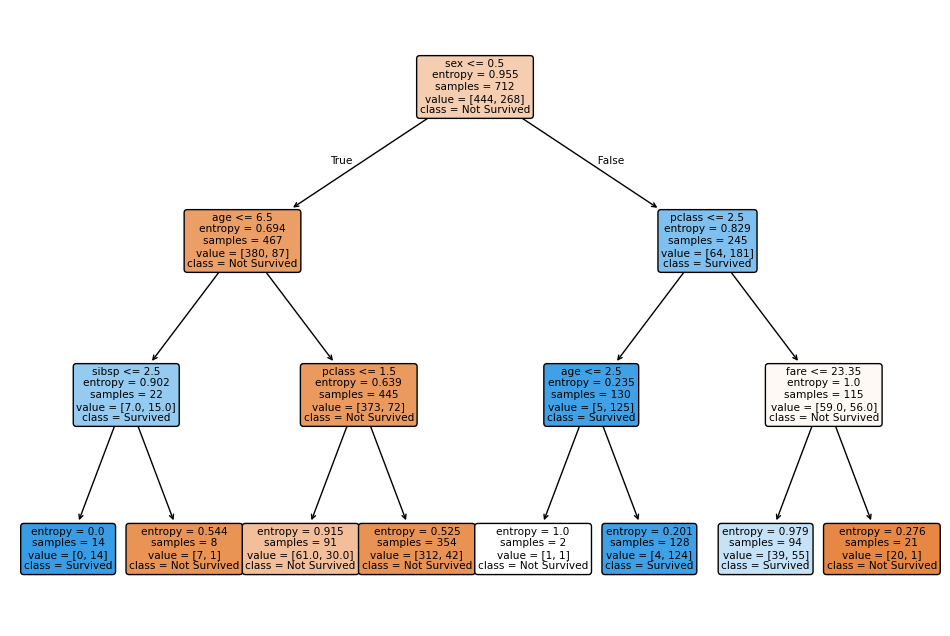

In [20]:
# Step 7: Visualize the Decision Tree Why visualize?: Helps understand the decision-making process of the tree.
# Plot the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True, rounded=True)
plt.show()


In [18]:
# Step 8: Save the Model as a .dot File Why save?: To visualize the tree using external tools like Graphviz or online tools.
# Save the tree to a .dot file
with open("decision_tree.dot", "w") as f:
    export_graphviz(clf, out_file=f, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True, rounded=True)
print("Decision Tree saved as decision_tree.dot")


Decision Tree saved as decision_tree.dot


Explanation of Steps

    Load Dataset: Titanic dataset from Seaborn contains survival information and other features like age, gender, etc.
    Preprocessing: Missing values are filled to ensure the model works without errors. Non-numeric columns are converted to numeric.
    Split Data: Separates training and testing data to evaluate model performance.
    Train Model: Fits a Decision Tree to the training data.
    Visualize Tree: Displays splits and decision-making paths.
    Save Tree: .dot file is created to share or further visualize the model externally.
    Graph Output

The graph shows:

    Splits at each node based on feature thresholds.
    Leaf nodes with class predictions (Survived or Not Survived).
    Proportion of samples in each class.
    Use in Real Life

    Example Applications:
        Predict customer churn (whether a customer will leave).
        Diagnose diseases based on symptoms.
        Fraud detection in banking.